In [1]:
import requests
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np

In [2]:
lat_1 = 0
lat_2 = 180
lon_1 = 0
lon_2 = 360
r = requests.get(f'http://144.206.233.183/thredds/dodsC/Data/s362d.nc.ascii?data[0:1:0][{lon_1}:1:{lon_2}]\
                                                                                       [{lat_1}:1:{lat_2}]')

In [3]:
raw_data = r.text

In [4]:
mt = re.compile(r'\n\[0\]\[\d*\],.*')
lat_values = mt.findall(raw_data)
#lat_values

In [5]:
mt = re.compile(r'\[0\]\[\d*\], ')
lat_values_cleaned = []
for i in lat_values:
    temp = re.sub(mt, '', i)
    temp = re.sub('\n', '', temp)
    lat_values_cleaned.append(temp)

final_data = []
for i in lat_values_cleaned:
        final_data.append(re.split(r', ', i))

In [6]:
df = pd.DataFrame(final_data)
for i in range(0, df.shape[1]):
    df[i] = pd.to_numeric(df[i])
df

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,180
0,0.385779,0.367149,0.345551,0.321828,0.296935,0.271865,0.247572,0.224913,0.204597,0.187166,...,0.092801,0.080137,0.060717,0.037633,0.014293,-0.005914,-0.019954,-0.025444,-0.020887,-0.005811
1,0.385779,0.367819,0.347095,0.324435,0.300759,0.277011,0.254087,0.232774,0.213713,0.197380,...,0.092365,0.079278,0.059534,0.036248,0.012840,-0.007301,-0.021147,-0.026329,-0.021367,-0.005811
2,0.385779,0.368494,0.348652,0.327058,0.304602,0.282176,0.260616,0.240640,0.222822,0.207573,...,0.091850,0.078349,0.058298,0.034828,0.011369,-0.008693,-0.022336,-0.027206,-0.021841,-0.005811
3,0.385779,0.369175,0.350219,0.329697,0.308461,0.287355,0.267152,0.248504,0.231916,0.217736,...,0.091256,0.077349,0.057006,0.033372,0.009879,-0.010088,-0.023520,-0.028075,-0.022310,-0.005811
4,0.385779,0.369861,0.351796,0.332349,0.312334,0.292544,0.273691,0.256360,0.240986,0.227858,...,0.090579,0.076277,0.055659,0.031879,0.008371,-0.011488,-0.024699,-0.028936,-0.022773,-0.005811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,0.385779,0.364533,0.339508,0.311602,0.281888,0.251543,0.221758,0.193655,0.168225,0.146276,...,0.093817,0.082928,0.064945,0.042839,0.019940,-0.000399,-0.015133,-0.021832,-0.018916,-0.005811
357,0.385779,0.365177,0.340997,0.314124,0.285607,0.256575,0.228163,0.201427,0.177288,0.156485,...,0.093666,0.082322,0.063960,0.041585,0.018552,-0.001773,-0.016345,-0.022746,-0.019417,-0.005811
358,0.385779,0.365828,0.342501,0.316671,0.289356,0.261643,0.234605,0.209233,0.186376,0.166708,...,0.093449,0.081657,0.062928,0.040300,0.017149,-0.003150,-0.017553,-0.023653,-0.019912,-0.005811
359,0.385779,0.366485,0.344019,0.319239,0.293133,0.266740,0.241076,0.217063,0.195482,0.176939,...,0.093162,0.080930,0.061848,0.038983,0.015729,-0.004530,-0.018756,-0.024552,-0.020402,-0.005811


181


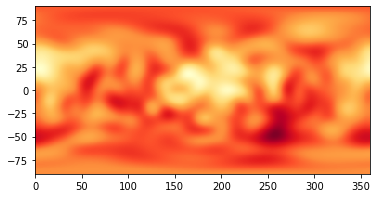

In [7]:
a = df.to_numpy()
a = a.transpose()
print(len(a))
plt.imshow(a, cmap='YlOrRd', alpha=1, extent=[lon_1, lon_2, -lat_2 + 90., -lat_1 + 90.])
plt.show()

In [8]:
def basemap(llcrnrlat=-lat_2 + 90, urcrnrlat=-lat_1 + 90, llcrnrlon=lon_1, urcrnrlon=lon_2):
    m = Basemap(projection='cyl',llcrnrlat=llcrnrlat ,urcrnrlat=urcrnrlat, 
                 llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon,resolution='c')
    m.drawcoastlines()
    #m.fillcontinents(color='coral',lake_color='aqua')
    #m.drawparallels(np.arange(-90.,91.,30.))
    #m.drawmeridians(np.arange(0.,361.,60.))
    m.drawmapboundary(fill_color='aqua')
    plt.imshow(a, cmap='YlOrRd', alpha=1, extent=[lon_1, lon_2, -lat_2 + 90., -lat_1 + 90.])
    plt.show()

C:\Users\fruit\Anaconda3\envs\map_2\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


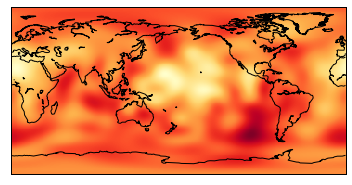

In [9]:
basemap()